<a href="https://colab.research.google.com/github/Chromis07/dataStudy/blob/main/ML/iris/%EB%B6%93%EA%BD%83(iris)_%ED%92%88%EC%A2%85_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import matplotlib
print("matplotlib 버전:", matplotlib.__version__)

import numpy as np
print("NumPy 버전", np.__version__)

import scipy as sp
print("SciPy 버전:", sp.__version__)

import IPython
print("IPython 버전:", IPython.__version__)

import sklearn
print("scikit-learn 버전:", sklearn.__version__)

Python 버전: 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
pandas 버전: 1.1.5
matplotlib 버전: 3.2.2
NumPy 버전 1.19.5
SciPy 버전: 1.4.1
IPython 버전: 5.5.0
scikit-learn 버전: 0.22.2.post1


첫 번째 어플리케이션 : 붓꽃의 품종 분류

*   데이터, 특성(feature) : 독립변수, 꽃잎(petal), 곷받침(sepal) 폭과 길이
*   클래스(class), 레이블{label}, 타깃(target) : 종속변수, 붓꽃의 품종 (sestosa, versicolor, vriginica)



데이터 적재 (https://archive.ics.uci.edu/ml/datasets/iris)

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

데이터 확인하기

In [4]:
iris_dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [5]:
print("iris_dataset의 키 :\n", iris_dataset.keys())

iris_dataset의 키 :
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
# 타깃의 이름 -> 품종 확인
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris_dataset['target'] # 'setosa' : 0, 'versicolor' : 1, 'verginica' : 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# 특성의 이름 학인
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris_dataset['data'].shape # 데이터의 형태 확인

(150, 4)

In [14]:
type(iris_dataset['data']) # 데이터의 타입 확인

numpy.ndarray

In [15]:
iris_dataset['target'].shape # 타겟의 형태 확인

(150,)

In [16]:
type(iris_dataset['target']) # 타겟의 타입 확인

numpy.ndarray

성과 측정 : 훈련 데이터와 데스트 데이터 분리

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], test_size = 0.25,
    random_state = 777)

training 데이터 확인하기

In [19]:
print("X_train의 크기 :", X_train.shape)
print("y_train의 크기 :", y_train.shape)

X_train의 크기 : (112, 4)
y_train의 크기 : (112,)


test 데이터 확인하기

In [20]:
print("X_test의 크기 :", X_test.shape)
print("y_test의 크기 :", y_test.shape)

X_test의 크기 : (38, 4)
y_test의 크기 : (38,)


가장 먼저 할 일 : 데이터 살펴보기

In [26]:
import matplotlib.pyplot as plt

# X_train 데이터를 사용해서 데이터프레임 만들기 -> 데이터 시각화를 위해
# 열의 이름은 iris_dataset.feature_names에 있는 문자열 사용
iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.9,2.4,3.3,1.0
1,4.6,3.4,1.4,0.3
2,4.4,3.2,1.3,0.2
3,6.3,2.7,4.9,1.8
4,5.5,2.6,4.4,1.2


iris 데이터 시각화

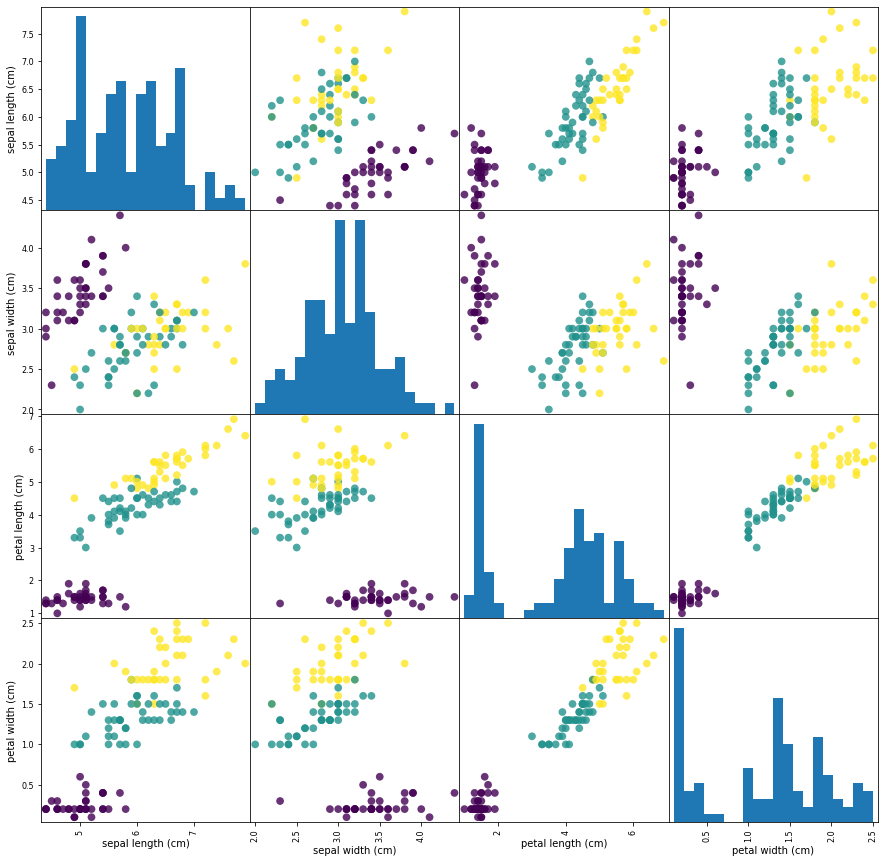

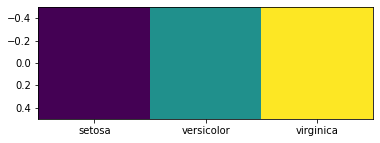

In [29]:
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15,15), marker='o',
                           hist_kwds={'bins' : 20}, s=60, alpha=.8)

plt.show()
print()
plt.imshow([np.unique(y_train)])
_ = plt.xticks(ticks=np.unique(y_train), labels=iris_dataset['target_names'])
# return 값을 일단은 받아주기 위해 (오류 가능성)

첫 번째 머신러닝 모델 : k-최근접 이웃 알고리즘 (k-Nearist Neighbors, KNN)

k-최근접 이웃 알고리즘 이웃 설정

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # 이웃의 개수를 1개로 지정

학습하기

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [33]:
X_new = np.array([[5, 2.9, 1, 0.2]]) # 꽃받침 길이, 폭, 꽃잎 길이, 폭 가상의 새 데이터
print("X_new.shape :", X_new.shape)

X_new.shape : (1, 4)


예측하기

In [34]:
prediction = knn.predict(X_new) # 가상의 데이터로 어떤 붓꽃 품종인지 예측
print("예측 :", prediction)
print("예측한 타깃의 이름 :", iris_dataset['target_names'][prediction])

예측 : [0]
예측한 타깃의 이름 : ['setosa']


모델 평가하기

In [35]:
y_pred = knn.predict(X_test) # test set을 사용해서 모델 예측 후 평가
print("test set에 대한 예측값 :", y_pred)

test set에 대한 예측값 : [2 0 2 2 1 0 2 2 0 0 2 1 1 2 2 2 0 2 0 1 1 1 2 0 2 0 2 0 2 2 0 2 0 2 1 0 0
 0]


mean() 함수 사용하여 정확도 확인

In [36]:
np.mean(y_pred == y_test) # True의 수 평균

# 정확도 97.36%

0.9736842105263158

score() 함수 사용하여 정확도 확인

In [37]:
knn.score(X_test, y_test)

0.9736842105263158